In [1]:
from mnist_dataset import ImageAndLabelSet
from networks import FCNet, ResNet6
import numpy as np
from os import path
import matplotlib.pyplot as plt

In [2]:
# Get the dataset
mnist_data_root = path.expanduser("~/data/mnist")

image_and_label_set = ImageAndLabelSet(path.join(mnist_data_root, 'train-images-idx3-ubyte'),
                                       path.join(mnist_data_root, 'train-labels-idx1-ubyte'),
                                       training_fraction=(5.0/6.0))

In [ ]:
image_and_label_set.get_validation_batches()

In [ ]:
?Generator

In [ ]:
from typing import Generator

def foo(x: Generator[int, None, None]):
    return None

# Fully Connected Network

In [ ]:
# Define a network that downsamples and then trains a single FC layer
fc_net = FCNet()

for b in range(1000):
    image_batch, label_batch = image_and_label_set.get_next_training_batch(batch_size=32)
    image_batch = np.reshape(image_batch, (-1, 28, 28, 1)) # Add a channel dimension
    
    fc_net.train_batch(image_batch, label_batch)
    
    if b % 100 == 0:
        print('batch {}: CE: {}\tacc: {}'.format(b, fc_net._running_ce.get(), fc_net._running_acc.get()))

In [ ]:
# Plot the training results for this network
fig, ax = plt.subplots()
ax.plot(fc_net._ce_history)
ax2 = ax.twinx()
ax2.plot([100.0*(1.0 - x) for x in fc_net._acc_history], 'r')
ax2.set_yscale('log')
ax2.set_ylabel('Error rate (%)')
plt.show()

# ResNet6

In [3]:
# Define a network that downsamples and then trains a single FC layer
res_net = ResNet6()

for b in range(10000):
    image_batch, label_batch = image_and_label_set.get_next_training_batch(batch_size=32)
    image_batch = np.reshape(image_batch, (-1, 28, 28, 1)) # Add a channel dimension
    
    res_net.train_batch(image_batch, label_batch)
    
    if b % 100 == 0:
        print('batch {}: CE: {}\tacc: {}'.format(b, res_net._running_ce.get(), res_net._running_acc.get()))
        
    if b % 500 == 0:
        res_net.evaluate_on_batch_generator(image_and_label_set.get_validation_batches())
        
#         print('Running validation...')
#         count = 0.0; ce_val = 0.0; acc_val = 0.0
#         for image_batch, label_batch in image_and_label_set.get_validation_batches():
#             image_batch = np.reshape(image_batch, (-1, 28, 28, 1)) # Add a channel dimension
#             count_this_batch, ce_this_batch, acc_this_batch = res_net.evaluate_on_batch(image_batch, label_batch)
#             ce_val += (ce_this_batch - ce_val) * count_this_batch / (count_this_batch + count)
#             acc_val += (acc_this_batch - acc_val) * count_this_batch / (count_this_batch + count)
#             count += count_this_batch
#         print('Count: {}'.format(count))
#         print('Acc: {}'.format(acc_val))
#         print('CE loss: {}'.format(ce_val))
            
        

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
batch 0: CE: 2.3006715774536133	acc: 0.21875
batch 100: CE: 2.1917957773290664	acc: 0.25671476229242807
batch 200: CE: 1.1849706113410379	acc: 0.6053414812557002
batch 300: CE: 0.6270974455483389	acc: 0.7941053614812806
batch 400: CE: 0.3841447820239219	acc: 0.8790316841044731
batch 500: CE: 0.26114868303943006	acc: 0.9165114864636473
batch 600: CE: 0.1983020704757997	acc: 0.933675833921528
batch 700: CE: 0.16691839495210314	acc: 0.9440532368025171
batch 800: CE: 0.13972974626019496	acc: 0.9568547182920788
batch 900: CE: 0.1218102844376135	acc: 0.9629490414809346
batch 1000: CE: 0.10833771668805046	acc: 0.9677968834840442
batch 1100: CE: 0.09125116471692453	acc: 0.9733415595676361
batch 1200: CE: 0.08659815979467464	acc: 0.9720384935112005
batch 1300: CE: 0.08483861601102367	acc: 0.9723157013048906
batch 1400: CE: 0.0895010763651791	acc: 0.9705553310122021
batch 1500:

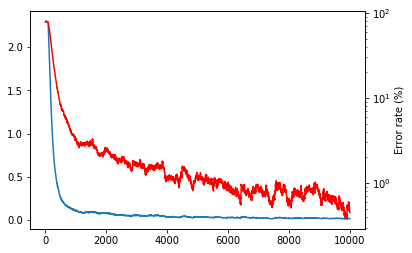

In [4]:
# Plot the training results for this network
fig, ax = plt.subplots()
ax.plot(res_net._ce_history)
ax2 = ax.twinx()
ax2.plot([100.0*(1.0 - x) for x in res_net._acc_history], 'r')
ax2.set_yscale('log')
ax2.set_ylabel('Error rate (%)')
plt.show()

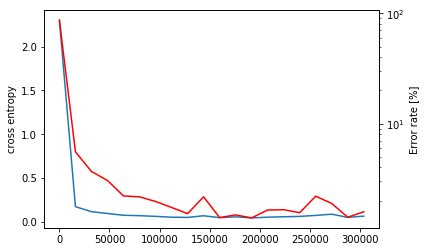

Error rate after 304032 training samples is 1.58%


In [18]:
# Plot the validation results
fig, ax = plt.subplots()
num_samples, ce_hist, acc_hist = [res_net.get_validation_history()[x]
                                  for x in ['num_training_examples', 'cross-entropy', 'accuracy']]
ax.plot(num_samples, ce_hist)
ax.set_ylabel('cross entropy')
ax2 = ax.twinx()
ax2.plot(num_samples, [100.0*(1.0 - acc) for acc in acc_hist], 'r')
ax2.set_yscale('log')
ax2.set_ylabel('Error rate [%]')
plt.show()

print('Error rate after {} training samples is {:.4}%'.format(num_samples[-1], 100.0*(1.0 - acc_hist[-1])))